<a href="https://colab.research.google.com/github/masterford/SpeakerProfiling/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the data loading scrip

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
! pip install aubio 
! pip install amfm_decompy

     |████████████████████████████████| 747kB 2.7MB/s 
  Created wheel for amfm-decompy: filename=AMFM_decompy-1.0.8.1-cp36-none-any.whl size=45763 sha256=50196aa68dbb69869654bdcdcdce04513e9bae3fff2cdeb130e50e8c9bff4316
  Stored in directory: /root/.cache/pip/wheels/61/a8/42/bc34814e35023b767e4ec0875683a6395d6e8f91fb0ff0800f
Successfully built amfm-decompy


In [0]:
data_root_path = 'gdrive/My Drive/CIS519 Final Project/Data'
!ls "gdrive/My Drive/CIS519 Final Project/Data"

 X_Test    y_Train.csv	   'y_Train - y_Train_Valid (1).csv'
 X_Train   y_Train.gsheet


In [0]:
testing_wav_path = 'gdrive/My Drive/CIS519 Final Project'
!ls "gdrive/My Drive/CIS519 Final Project"

ls: cannot access 'testing_wav_path': No such file or directory


In [0]:
import csv
y_Train_data = {}
with open(data_root_path+"/y_Train.csv", newline='') as f:
    reader = csv.reader(f)
    firstRow = True
    for row in reader:
        if not firstRow:
          y_Train_data[row[0]] = {'uid':row[0], 'name':row[1], 'gender':row[2], 'nationality':row[3]}
        else:
          firstRow = False

In [0]:
class Person:
  def __init__(self, uid, name, gender, nationality):
    self.uid=uid
    self.name = name
    self.gender = gender
    self.nationality = nationality
    self.wavs = set()
  def pprint(self):
    print(self.toString())
  def toString(self):
    string = "[ID={} | Name={} | Gender={} | Nationality= {}]".format(self.uid, self.name, self.gender, self.nationality)
    for wav in self.wavs:
      string += "\n   " + wav
    return string

gdrive/My Drive/CIS519 Final Project


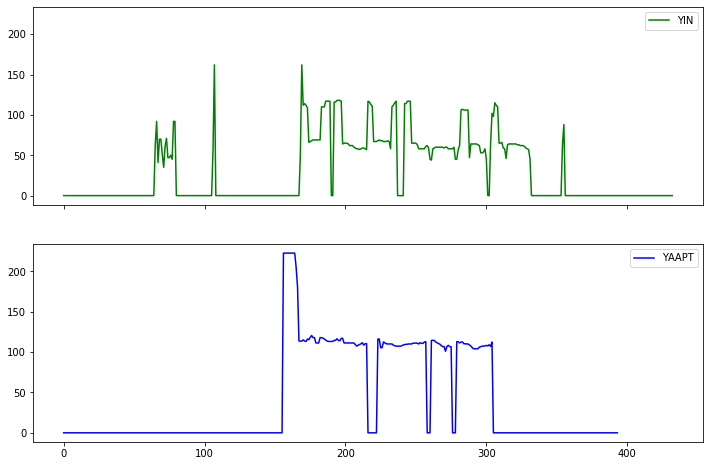

In [0]:
import amfm_decompy.basic_tools as basic
import amfm_decompy.pYAAPT as pYAAPT
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from aubio import source, pitch 

# load audio
print (testing_wav_path)
signal = basic.SignalObj(testing_wav_path+"/testing_wav.wav")
filename = testing_wav_path+"/testing_wav.wav"

# YAAPT pitches 
pitchY = pYAAPT.yaapt(signal, frame_length=40, tda_frame_length=40, f0_min=75, f0_max=600)

# YIN pitches
downsample = 1
samplerate = 0
win_s = 1764 // downsample # fft size
hop_s = 441 // downsample # hop size
s = source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.8
pitch_o = pitch("yin", win_s, hop_s, samplerate) 
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)
pitchesYIN = []
confidences = [] 
total_frames = 0
while True:
     samples, read = s()
     pitch = pitch_o(samples)[0]
     pitch = int(round(pitch))
     confidence = pitch_o.get_confidence()
     pitchesYIN += [pitch]
     confidences += [confidence]
     total_frames += read
     if read < hop_s:
         break          
# plot
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 8))
ax1.plot(np.asarray(pitchesYIN), label='YIN', color='green')
ax1.legend(loc="upper right")
ax2.plot(pitchY.samp_values, label='YAAPT', color='blue')
ax2.legend(loc="upper right")
plt.show()

In [0]:
persons_set =  set()

import os
directory = os.walk(data_root_path+"/X_Train")
for dirName, subDirName, fileList in directory:
  if dirName == data_root_path+"/X_Train":
    for person in subDirName:
      print("Found person {}".format(person))
      if person in y_Train_data:
        person_meta_data =y_Train_data[person]
        gender = person_meta_data["gender"]
        nationality = person_meta_data["nationality"]
        name = person_meta_data["name"]
        person_struct = Person(person, name, gender, nationality)
        persons_set.add(person_struct)
      #else:
        #print("Could not find \"{}\" in the y_Train csv".format(person))

Found person id10216
Found person id10217
Found person id10215
Found person id10212
Found person id10220
Found person id10211
Found person id10214
Found person id10213
Found person id10218
Found person id10227
Found person id10223
Found person id10226
Found person id10222
Found person id10224
Found person id10221
Found person id10229
Found person id10225
Found person id10228
Found person id10230
Found person id10239
Found person id10235
Found person id10234
Found person id10232
Found person id10237
Found person id10238
Found person id10231
Found person id10236
Found person id10233
Found person id10240
Found person id10245
Found person id10243
Found person id10241
Found person id10248
Found person id10246
Found person id10250
Found person id10244
Found person id10242
Found person id10247
Found person id10249
Found person id10255
Found person id10256
Found person id10259
Found person id10253
Found person id10251
Found person id10257
Found person id10258
Found person id10260
Found person 

KeyboardInterrupt: ignored

In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile

#BASIC TEST OF FFT CONVERSION
#See https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

nationalityVector = ['Ireland','India','USA','Australia','Canada','UK','Norway','Italy','Sudan','Mexico','China','Switzerland','Guyana','Philippines','New Zealand','Germany','Portugal','Netherlands','Spain','France','Pakistan','Croatia','South Korea','Sweden','Russia','Poland','Sri Lanka','Singapore','Chile','Israel','Brazil','Trinidad and Tobago','Denmark','Austria','South Africa','Iran']
def getNationalityIndex(nationality):
  for i in range(0,len(nationatliyVector)):
    if nationalityVector[i] == nationality:
      return i;
  
def getNationalityFromIndex(index):
  return nationalityVector[index]

genderVector = ['f','m']
def getGenderIndex(gender):
  for i in range(0,len(genderVector)):
    if genderVector[i] == gender:
      return i;

def getGenderFromIndex(index):
  return genderVector[index]


class DataPoint:
  def __init__(self, filePath, gender, nationality):
    self.filePath  = filePath
    self.gender = gender
    self.nationality = nationality

  def getWav(self):
    fs_rate, signal = wavfile.read(self.filePath) # load the data
    return (fs_rate, signal)

  def getNationalityVect(self):
    nationalityIndex = getNationalityIndex(self.nationality)
    return [nationalityIndex==i for i in range(0,len(nationalityVector))]

  def getGenderVect(self):
    genderIndex = getGenderIndex(self.gender)
    return [genderIndex==i for i in range(0,len(genderVector))]

  def getTotalVector(self):
    return self.getNationalityVect()+self.getGenderVect()

  def getXY(self):
    _,fft = self.getFFTAMRadioQuality()
    mapping = self.getTotalVector()
    return (fft,mapping)

  def getFFT(self):
    fs_rate, signal = self.getWav()
    l_audio = len(signal.shape)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(N//2)] # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    return (freqs_side, abs(FFT_side))

  def getFFTAMRadioQuality(self):
    #5kHz as max
    #1 data point per hz
    fftX, fftY = self.getFFT()
    maxFreq = 5000
    newX = [i for i in range(0, maxFreq+1)]
    newY = [0 for i in range(0,maxFreq+1)]
    fftXIndex = 0
    for i in range(0, maxFreq+1):
      fftYBinSamplesAvg = 0
      fftYBinSamplesCount = 0
      while(fftX[fftXIndex] < (i+1)):
        fftXIndex += 1
        fftYBinSamplesAvg += fftY[fftXIndex]
        fftYBinSamplesCount += 1
      fftYBinSamplesAvg /= fftYBinSamplesCount
      newY[i] = fftYBinSamplesAvg
    maximumAmp = max(newY)
    for i in range(0,len(newY)):
      newY[i] /= maximumAmp
    #newY /= maximumAmp
    return (newX, newY)
      

Make a data point out of all of the celeb's wavs

In [0]:
data_points_set = set()

for person in persons_set:
  directory = os.walk(data_root_path+"/X_Train/"+person.uid)
  for dirName, subDirName, fileList in directory:
    #person.pprint()
    for f in fileList:
      person.wavs.add(dirName+"/"+f)
      dp = DataPoint(dirName+"/"+f, person.gender, person.nationality)
      data_points_set.add(dp)

KeyboardInterrupt: ignored

Get Datapoint Stats (pre-subsampling)

In [0]:
nationality_count = {}
gender_count = {}
for dp in data_points_set:
  if dp.gender in gender_count:
    gender_count[dp.gender] += 1
  else:
    gender_count[dp.gender] = 1
  if dp.nationality in nationality_count:
    nationality_count[dp.nationality] += 1
  else:
    nationality_count[dp.nationality] = 1

In [0]:
print(nationality_count)

{'USA': 525, 'UK': 38, 'Canada': 9, 'Russia': 2, 'Germany': 1, 'India': 5, 'Sweden': 3, 'Australia': 3, 'Ireland': 1}


In [0]:
print(gender_count)

{'m': 506, 'f': 81}


Time to subsample

In [0]:
import math
desired_nationality_count = nationality_count
#TODO: bring above average nations to average count
#At least 100 data points
#TODO: keep "trimmings" use them as test data
count_threashold = 100
average_nationality_count = 0
nations = 0
for nation, count in nationality_count.items():
  average_nationality_count += count
  nations += 1
average_nationality_count /= nations
average_nationality_count = math.floor(average_nationality_count)

for nation, count in nationality_count.items():
  if count > average_nationality_count:
    desired_nationality_count[nation] = average_nationality_count
  if count < count_threashold:
    desired_nationality_count[nation] = 0

print(desired_nationality_count)

{'USA': 65, 'UK': 0, 'Canada': 0, 'Russia': 0, 'Germany': 0, 'India': 0, 'Sweden': 0, 'Australia': 0, 'Ireland': 0}


In [0]:
data_points_set_subsampled = set()
data_points_set_not_subsampled = set()
current_nationality_count = {nationality: 0 for nationality, count in desired_nationality_count.items()}
for sample in data_points_set:
#TODO: don't affect gender breakdown when subsampling!
  if current_nationality_count[sample.nationality] < desired_nationality_count[sample.nationality]:
    data_points_set_subsampled.add(sample)
    current_nationality_count[sample.nationality] += 1
  else:
    data_points_set_not_subsampled.add(sample)

In [0]:
nationality_count = {}
gender_count = {}
for dp in data_points_set_subsampled:
  if dp.gender in gender_count:
    gender_count[dp.gender] += 1
  else:
    gender_count[dp.gender] = 1
  if dp.nationality in nationality_count:
    nationality_count[dp.nationality] += 1
  else:
    nationality_count[dp.nationality] = 1

print(nationality_count)
print(gender_count)

{'USA': 65}
{'f': 10, 'm': 55}


In [0]:
training_set = data_points_set_subsampled
testing_set = data_points_set_not_subsampled

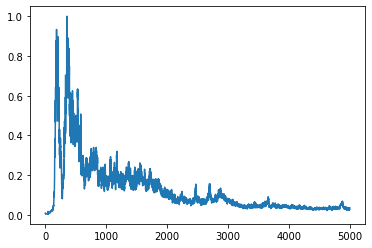

In [0]:
for dp in training_set:
  x,y = dp.getFFTAMRadioQuality()
  plt.plot(y)
  break;

This is the actual network we feed the data through

In [0]:
#Age is a category: we can 

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
# This is the implementation of the second network architecture. 
class Convolutional(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1,
                                 out_channels=7,
                                 kernel_size=3,
                                 stride=1,
                                 padding=0)
    self.pool = torch.nn.MaxPool2d(2, stride=2)
    self.conv2 = torch.nn.Conv2d(in_channels=7, out_channels=16, kernel_size=3, stride=1, padding=0)
    self.fc1 = torch.nn.Linear(2704, 130)
    self.fc2 = torch.nn.Linear(130, 72)
    self.fc3 = torch.nn.Linear(72,10)

  def forward(self, X):
    conv1X = self.conv1(X)
    poolX = self.pool(conv1X)
    conv2X = self.conv2(poolX)
    relu1 =  torch.nn.functional.relu(conv2X)
    batch_size = relu1.size(0)
    reshapedX =  relu1.view(batch_size, -1)
    fc1X = self.fc1(reshapedX)
    fc2X = self.fc2(torch.nn.functional.relu(fc1X))
    fc3X = self.fc3(torch.nn.functional.relu(fc2X))
    final = torch.sigmoid(fc3X)
    return final

**Structure of network**
1.   Raw Sound (open)
2.   Freq Domain Summary of Clip (FFT)
3.   Predict Gender using {2} (Conv)
4.   Prdict Nationality using {2} and {3} as inputs. (Conv)


In [0]:
# Featurizing: average all samples within time splice, to get idea of peaks/valleys:

def get_cadence (X, T):
  i = 0
  averaged = []
  # todo consideration: remove noise? or is it unecessary
  # also cut to 4s
  while (i < len(X)):
    if (i + T > len(X)):
      averaged.append(mean(X[i:]))
    else:
      averaged.append(mean(X[i:i+T]))
  return averaged

Loading and Featurizing Blocks


In [0]:
# THIS BLOCK OF CODE SHOULD, given a network, iterate over the dataset and 
# compute the accuracy of the model and the average loss.

def compute_loss_and_accuracy(network, data_loader):
  """
  Given a network, iterate over the dataset defined by the data_loader
  and compute the accuracy of the model and the average loss.
  """
  # This should be used to accumulate the total loss on the dataset
  total_loss = 0

  # This should count how many examples were correctly classified.
  num_correct = 0

  # This should count the number of examples in the dataset. (Be careful
  # because it should -not- be the number of batches.)
  num_instances = 0

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size
  cross_entropy_loss = torch.nn.CrossEntropyLoss()
  
  for X, y in data_loader:
    # Implement computing the loss and
    # calculate the number of correct examples.
    batch_size = X.size(0)
    num_instances += batch_size
    outputs = network(X)
    loss = cross_entropy_loss(outputs, y)

    total_loss += loss.item() * batch_size
    y_as_numpy = y.cpu().numpy()
    _, predicted = torch.max(outputs, 1)
    for i in range(len(y_as_numpy)):
      if y_as_numpy[i] == predicted[i].item():
        num_correct += 1
  
  accuracy = num_correct / num_instances * 100
  average_loss = total_loss / num_instances
  return accuracy, average_loss

In [0]:
def run_experiment(network, train_data_loader, valid_data_loader, optimizer):
  # This will be a list of the average training losses for each epoch
  train_losses = []

  # This will be a list of the average validation losses for each epoch
  valid_accs = []

  # This will be a list of the validation accuracies for each epoch
  valid_losses = []

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size
  cross_entropy_loss = torch.nn.CrossEntropyLoss()

  for epoch in range(200):
    # This should be used to accumulate the total loss on the training data
    total_loss = 0.0

    # This should be used to count the number of training examples. (Be careful
    # because this is not the number of batches)
    num_instances = 0

    for X, y in train_data_loader:
      batch_size = X.size(0)
      num_instances += batch_size
      optimizer.zero_grad()
      outputs = network(X)
      loss = cross_entropy_loss(outputs, y)
      loss.backward()
      optimizer.step()
      total_loss += loss.item() * batch_size

    train_loss = total_loss / num_instances
    valid_acc, valid_loss = compute_loss_and_accuracy(network, valid_data_loader)

    train_losses.append(train_loss)
    valid_accs.append(valid_acc)
    valid_losses.append(valid_loss)
  return train_losses, valid_accs, valid_losses

Below: run the experiments

NameError: ignored

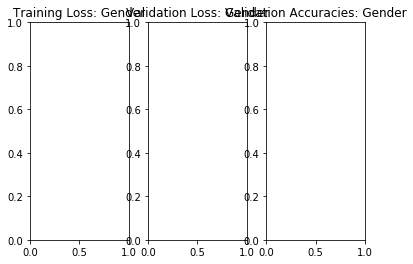

In [0]:
# sweep learning rate on model, to find the proper learning rate

# Implements the Convolutional experiment for gender data.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss: Gender')
axs[1].set_title('Validation Loss: Gender')
axs[2].set_title('Validation Accuracies: Gender')
#training_set
#testing_set
train_data_loader = set()
for dp in training_set:
  X,y = dp.getXY()
  Xnp = np.array(X)
  ynp = np.array(y)
  train_data_loader.add((Xnp,ynp))

valid_data_loader = set()

test_data_loader = set()
for dp in testing_set:
  X,y = dp.getXY()
  Xnp = np.array(X)
  ynp = np.array(y)
  test_data_loader.add((Xnp,ynp))

for lr in [0.5, 0.1, 0.05]:
  network = Convolutional()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy for Gender: ' + str(test_acc))